# <center> Stock Market Analysis

In this project we will be looking at data from the stock market, particularly some technology stocks.  We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!



In [44]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import scipy.stats as stat

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [96]:
# For reading stock data from yahoo
import pandas_datareader  as pdr
# For time stamps
from datetime import datetime

### Base Line Analysis

In [97]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']


In [98]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)
    

In [99]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564
2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,78.135223
2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,79.000244


In [100]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,98.326782,95.512067,96.907815,96.975157,1.566319e+08,96.690933
std,22.585071,22.084998,22.496995,22.317583,7.023522e+07,22.463118
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.298752,77.650625,78.318752,78.268124,1.089591e+08,77.834799
50%,95.677502,93.740002,94.277500,95.191250,1.377444e+08,94.856277
75%,118.754997,115.522501,117.127501,116.597498,1.870393e+08,116.541439
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [101]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-01-13 to 2021-01-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


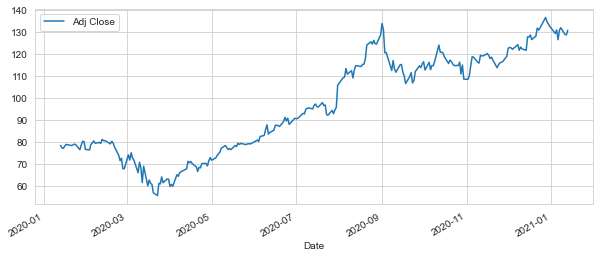

In [102]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

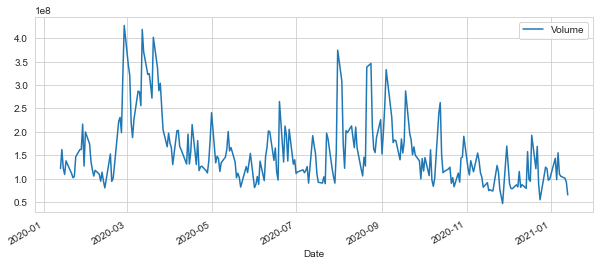

In [103]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [104]:
#calulating the moving average for apple stock
AAPL['ma_10days']=AAPL['Adj Close'].rolling(window=10).mean()
AAPL['ma_20days']=AAPL['Adj Close'].rolling(window=20).mean()
AAPL['ma_50days']=AAPL['Adj Close'].rolling(window=50).mean()

AAPL

,High,Low,Open,Close,Volume,Adj Close,ma_10days,ma_20days,ma_50days
Date,,,,,,,,,
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531,NaN,NaN,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702,NaN,NaN,NaN
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564,NaN,NaN,NaN
2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,78.135223,NaN,NaN,NaN
2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,79.000244,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.919998,131.884000,128.9605,122.105421
2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003,131.993000,129.4740,122.418437
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996,131.693999,129.7610,122.777867


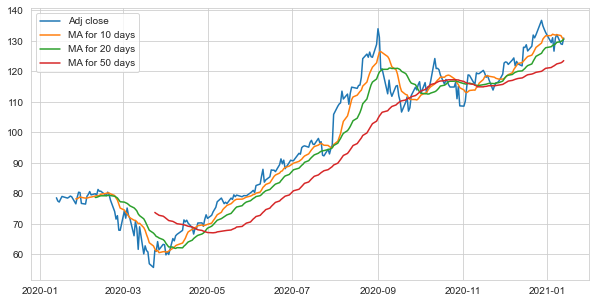

In [105]:
plt.figure(figsize=(10,5))
plt.plot(AAPL['Adj Close'],label='Adj close')

plt.plot(AAPL['ma_10days'],label='MA for 10 days')

plt.plot(AAPL['ma_20days'],label='MA for 20 days')

plt.plot(AAPL['ma_50days'],label='MA for 50 days')

plt.legend(loc=2)


### Daily Return Analysis

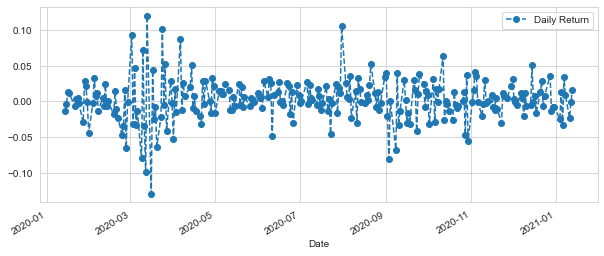

In [106]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

The above plot shows on any given day what is your percent return on money

Average daily return 

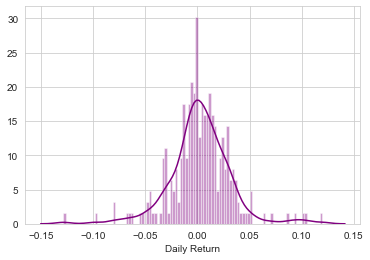

In [107]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


Analyzing the returns of all the stocks in our list

In [108]:
Closing_df = pdr.get_data_yahoo(['AAPL','GOOGL','MSFT','AMZN'], start, end)['Adj Close']
Closing_df

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-01-13,78.561531,1440.030029,161.568405,1891.300049
2020-01-14,77.500702,1430.589966,160.430450,1869.439941
2020-01-15,77.168564,1439.199951,161.469452,1862.020020
2020-01-16,78.135223,1450.160034,164.428116,1877.939941
2020-01-17,79.000244,1479.520020,165.348358,1864.719971
...,...,...,...,...
2021-01-07,130.919998,1774.339966,218.289993,3162.159912
2021-01-08,132.050003,1797.829956,219.619995,3182.699951
2021-01-11,128.979996,1756.290039,217.490005,3114.209961


In [111]:
stocks_returns = Closing_df.pct_change()
stocks_returns

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,-0.013503,-0.006555,-0.007043,-0.011558
2020-01-15,-0.004286,0.006018,0.006476,-0.003969
2020-01-16,0.012527,0.007615,0.018323,0.008550
2020-01-17,0.011071,0.020246,0.005597,-0.007040
...,...,...,...,...
2021-01-07,0.034123,0.029869,0.028457,0.007577
2021-01-08,0.008631,0.013239,0.006093,0.006496
2021-01-11,-0.023249,-0.023106,-0.009699,-0.021519


comparing the daily percentage return of two stocks to check how they are correlated.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


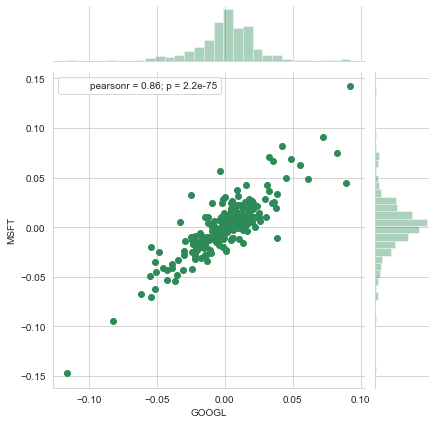

In [112]:
sns.jointplot('GOOGL','MSFT', stocks_returns, kind='scatter',color='seagreen',stat_func=stat.pearsonr)

with p=0.86 strongly correlated

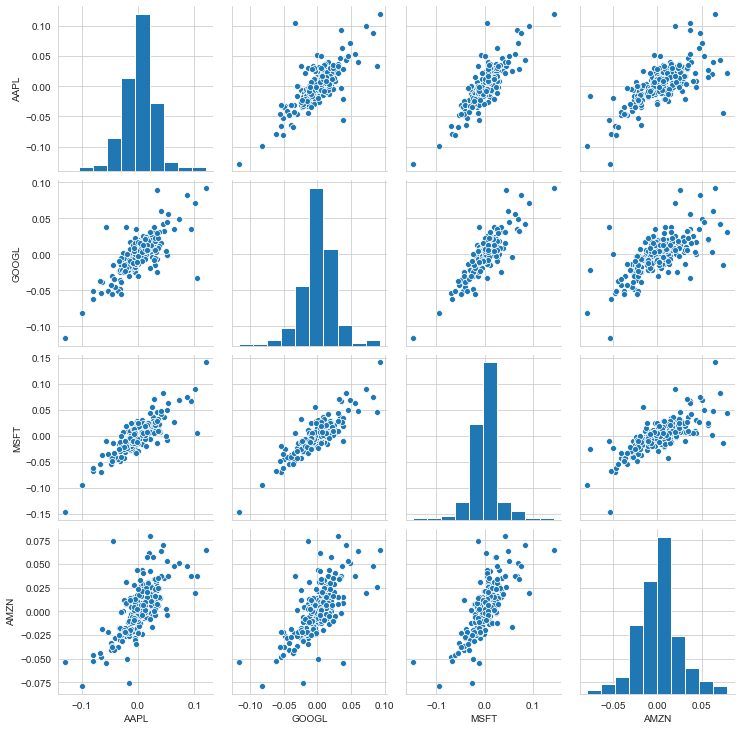

In [113]:
#automatic visual analysis of all the comparisons
sns.pairplot(stocks_returns.dropna())


Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Microsoft daily returns.

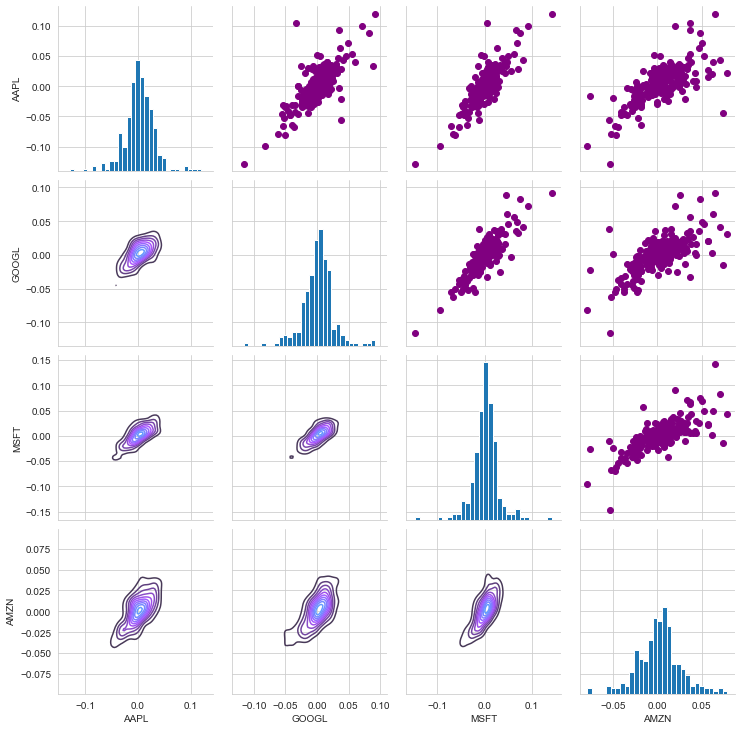

In [114]:
#Analyzying correlation of the daily returns between all the stocks using sns.PairGrid() 
stocks_returns_fig = sns.PairGrid(stocks_returns.dropna())

#Using map_upper we can specify what the upper triangle will look like.
stocks_returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure,
stocks_returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
stocks_returns_fig.map_diag(plt.hist,bins=30)






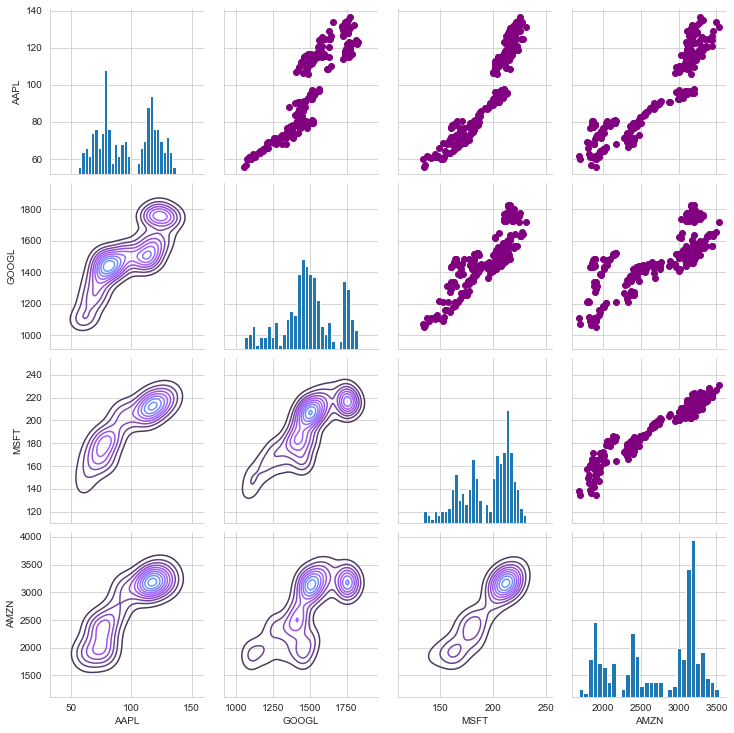

In [26]:
#Analyzying correlation of the closing prices of all the stocks using sns.PairGrid()
stocks_returns_fig = sns.PairGrid(Closing_df)

#Using map_upper we can specify what the upper triangle will look like.
stocks_returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure,
stocks_returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
stocks_returns_fig.map_diag(plt.hist,bins=30)




By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

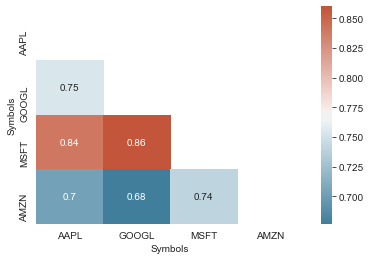

In [115]:
#correlation plot for the daily returns
#sns.corrplot(stock_returns.dropna(),annot=True)
corr = stocks_returns.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True, mask=mask)

we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.



### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.



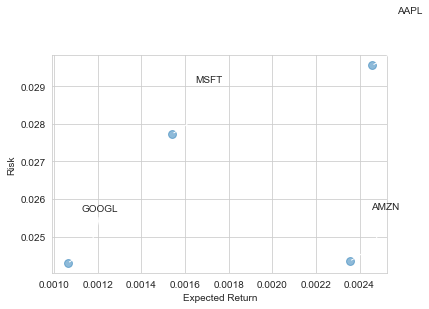

In [116]:
returns = stocks_returns.dropna()

area = np.pi*20

plt.scatter(returns.mean(), returns.std(), alpha=0.5, s=area)


plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
                       plt.annotate(
                       label,
                       xy=(x,y), xytext = (50, 50),
                       textcoords = 'offset points', horizontalalignment = 'right', verticalalignment = 'bottom',
                       arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

It looks like amazon is the best stock to pick from as expected returns are high and lower risk

#### Value at risk

We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval.
There are several methods we can use for estimating a value at risk.

###### Value at risk using the "bootstrap" method


For this method we will calculate the empirical quantiles from a histogram of daily returns.

In [117]:
returns.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-01-14,-0.013503,-0.006555,-0.007043,-0.011558
2020-01-15,-0.004286,0.006018,0.006476,-0.003969
2020-01-16,0.012527,0.007615,0.018323,0.008550
2020-01-17,0.011071,0.020246,0.005597,-0.007040
2020-01-21,-0.006777,0.001845,-0.003591,0.014630


##### for Apple stock

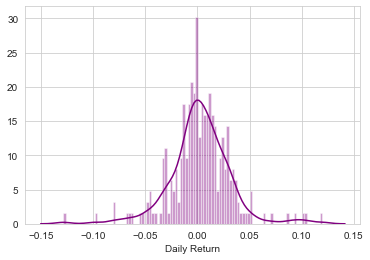

In [118]:

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [119]:
#Now we can use quantile to get the risk value for the stock.

returns['AAPL'].quantile(.005)

-0.09389429760666225

The 0.05 empirical quantile of daily returns is at -0.094. That means that with 95% confidence, our worst daily loss will not exceed 9.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.094 * 1,000,000 = $94,000.






###### For Google stock

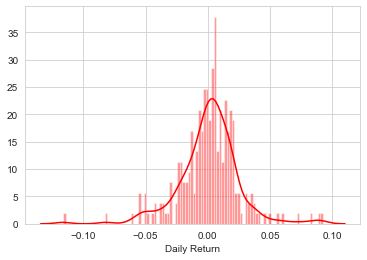

In [120]:

GOOGL['Daily Return']=GOOGL['Adj Close'].pct_change()
sns.distplot(GOOGL['Daily Return'].dropna(),bins=100,color='red')


In [121]:
#Now we can use quantile to get the risk value for the stock.

returns['GOOGL'].quantile(.005)

-0.07675688915025713

The 0.05 empirical quantile of daily returns is at -0.077. That means that with 95% confidence, our worst daily loss will not exceed 7.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.077 * 1,000,000 = $77,000.



###### For microsoft stock

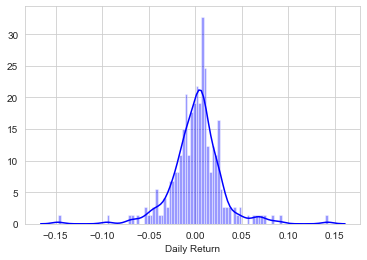

In [122]:

MSFT['Daily Return']=MSFT['Adj Close'].pct_change()
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='blue')


In [123]:
#Now we can use quantile to get the risk value for the stock.

returns['MSFT'].quantile(.005)

-0.08849963122508504

The 0.05 empirical quantile of daily returns is at -0.088. That means that with 95% confidence, our worst daily loss will not exceed 8.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.088 * 1,000,000 = $88,000.

##### For Amazon stock

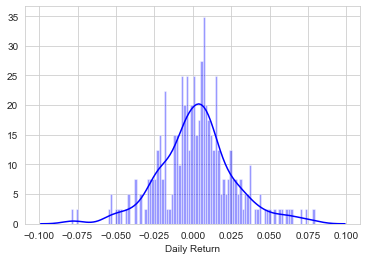

In [124]:
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='blue')


In [125]:
#Now we can use quantile to get the risk value for the stock.

returns['AMZN'].quantile(.005)

-0.07037951424211121

The 0.05 empirical quantile of daily returns is at -0.070. That means that with 95% confidence, our worst daily loss will not exceed 7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.070 * 1,000,000 = $70,000.

##### Value at Risk using the Monte Carlo method


Using the Monte Carlo, we gonna run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.



We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

<center> ΔS/S=μΔt+σϵ√Δt

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

<center> ΔS=S(μΔt+σϵ√Δt)
    
    
    
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


In [126]:
# Set up our time horizon
days = 365

# Now our delta
dt=1/days


# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = returns.mean()['GOOGL']


# Now let's grab the volatility of the stock from the std() of the average return
sigma = returns.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form out daily returns

In [127]:
def stock_monte_carlo(start_price, days, mu, sigma):

# Define a price array
    price=np.zeros(days)
    price[0] = start_price

# Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
# Run price array for number of days
    for x in range(1,days):
        
        #calculate shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
                                    
        #calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [82]:
# Get start price from GOOGL.head()
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-01-13,1441.479980,1425.369995,1435.250000,1440.030029,1536500,1440.030029,NaN
2020-01-14,1442.630005,1427.770020,1440.000000,1430.589966,1303800,1430.589966,-0.006555
2020-01-15,1440.780029,1431.660034,1433.020020,1439.199951,1077500,1439.199951,0.006018
2020-01-16,1450.699951,1440.000000,1445.449951,1450.160034,1304000,1450.160034,0.007615
2020-01-17,1480.550049,1456.550049,1462.540039,1479.520020,2621200,1479.520020,0.020246


In [128]:
start_price = 1435.25

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

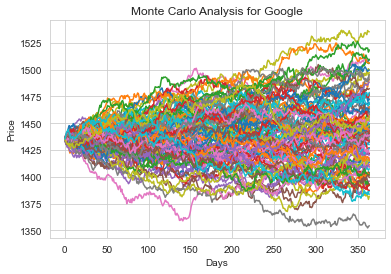

In [129]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [130]:
#histogram of the end results for a much larger run.
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)


# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(1000):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Now that we have our array of simulations, we can plot a histogram as well as use qunatile to define our risk for this stock

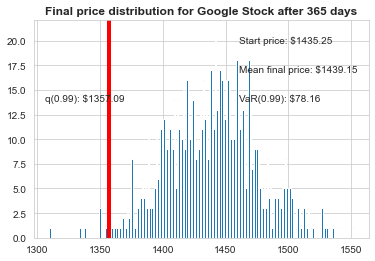

In [131]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)
    
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

## Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#plot a line at 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');




We have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $78.16 for every investment of 1435.25 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $78.16 at risk 99% of the time from our Monte Carlo Simulation.